## Multi Pair Plot
### seaborn.PairGrid
class seaborn.PairGrid(data, hue=None, hue_order=None, palette=None, hue_kws=None, vars=None, x_vars=None, y_vars=None, corner=False, diag_sharey=True, height=2.5, aspect=1, layout_pad=0, despine=True, dropna=True, size=None)
Subplot grid for plotting pairwise relationships in a dataset.

This class maps each variable in a dataset onto a column and row in a grid of multiple axes. Different axes-level plotting functions can be used to draw bivariate plots in the upper and lower triangles, and the the marginal distribution of each variable can be shown on the diagonal.

It can also represent an additional level of conditionalization with the hue parameter, which plots different subsets of data in different colors. This uses color to resolve elements on a third dimension, but only draws subsets on top of each other and will not tailor the hue parameter for the specific visualization the way that axes-level functions that accept hue will.

See the tutorial for more information.

__init__(self, data, hue=None, hue_order=None, palette=None, hue_kws=None, vars=None, x_vars=None, y_vars=None, corner=False, diag_sharey=True, height=2.5, aspect=1, layout_pad=0, despine=True, dropna=True, size=None)
Initialize the plot figure and PairGrid object.

Parameters
dataDataFrame
Tidy (long-form) dataframe where each column is a variable and each row is an observation.

huestring (variable name), optional
Variable in data to map plot aspects to different colors. This variable will be excluded from the default x and y variables.

hue_orderlist of strings
Order for the levels of the hue variable in the palette

palettedict or seaborn color palette
Set of colors for mapping the hue variable. If a dict, keys should be values in the hue variable.

hue_kwsdictionary of param -> list of values mapping
Other keyword arguments to insert into the plotting call to let other plot attributes vary across levels of the hue variable (e.g. the markers in a scatterplot).

varslist of variable names, optional
Variables within data to use, otherwise use every column with a numeric datatype.

{x, y}_varslists of variable names, optional
Variables within data to use separately for the rows and columns of the figure; i.e. to make a non-square plot.

cornerbool, optional
If True, don’t add axes to the upper (off-diagonal) triangle of the grid, making this a “corner” plot.

heightscalar, optional
Height (in inches) of each facet.

aspectscalar, optional
Aspect * height gives the width (in inches) of each facet.

layout_padscalar, optional
Padding between axes; passed to fig.tight_layout.

despineboolean, optional
Remove the top and right spines from the plots.

dropnaboolean, optional
Drop missing values from the data before plotting.

Examples

Draw a scatterplot for each pairwise relationship:

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


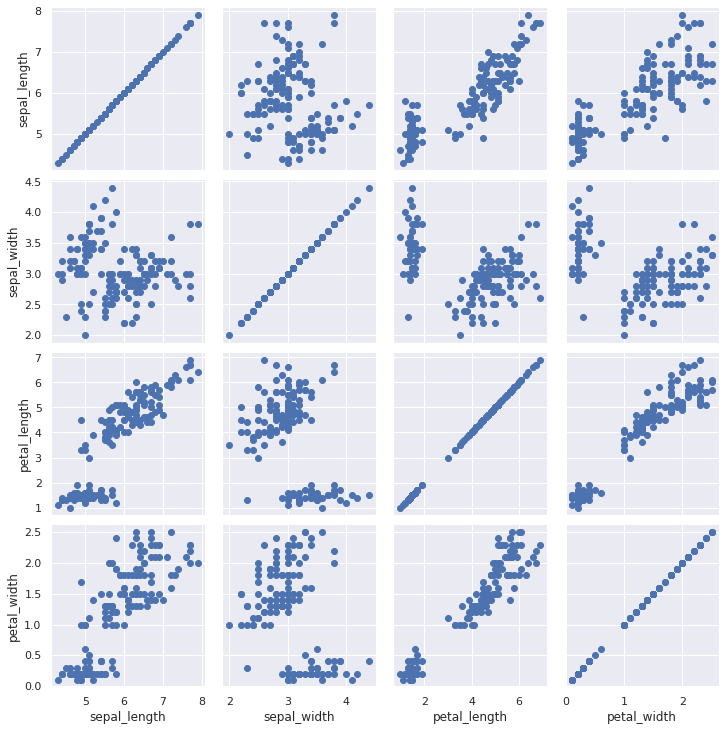

In [3]:
g = sns.PairGrid(data=iris)
g = g.map(plt.scatter)

Show a univariate distribution on the diagonal:

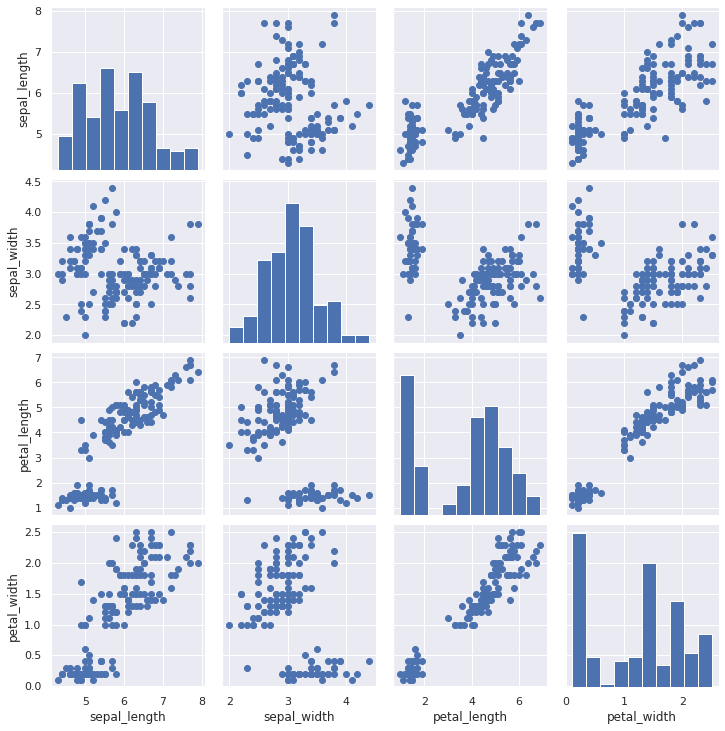

In [5]:
g = sns.PairGrid(data=iris)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

(It’s not actually necessary to catch the return value every time, as it is the same object, but it makes it easier to deal with the doctests).

Color the points using a categorical variable:

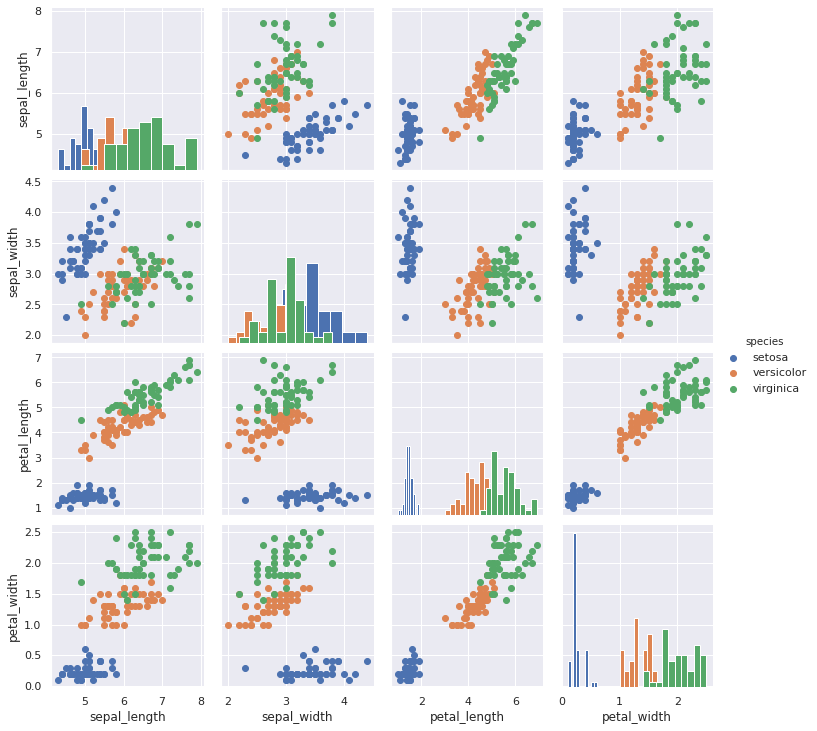

In [8]:
g = sns.PairGrid(data=iris, hue='species')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

Use a different style to show multiple histograms:

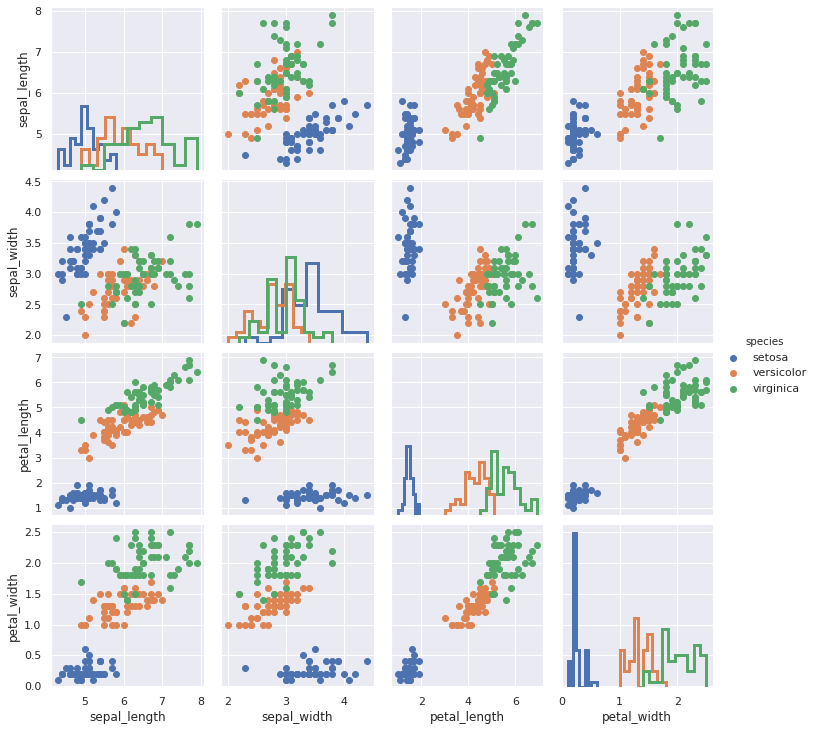

In [9]:
g = sns.PairGrid(data=iris, hue='species')
g = g.map_diag(plt.hist, histtype='step', linewidth=3)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

Plot a subset of variables

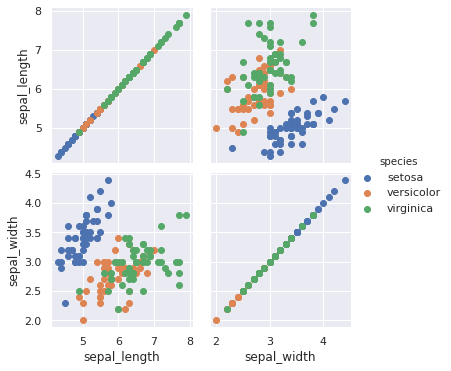

In [11]:
g = sns.PairGrid(data=iris, hue='species', vars=['sepal_length', 'sepal_width'])
g =g.map(plt.scatter)
g = g.add_legend()

Pass additional keyword arguments to the functions

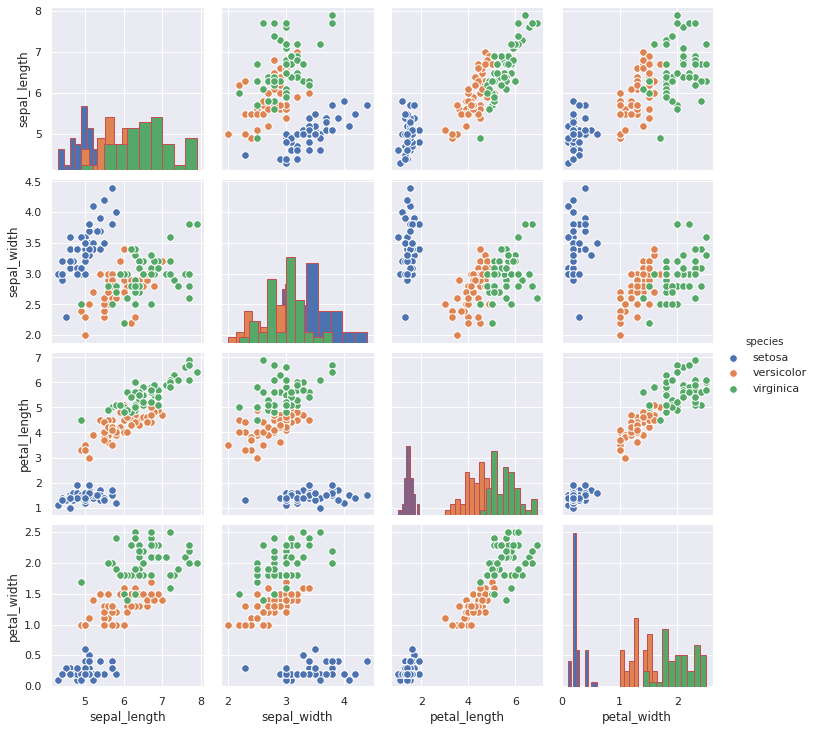

In [13]:
g = sns.PairGrid(data=iris, hue='species')
g = g.map_diag(plt.hist, edgecolor='r')
g = g.map_offdiag(plt.scatter, edgecolor='w', s=59)
g =g.add_legend()

Use different variables for the rows and columns:

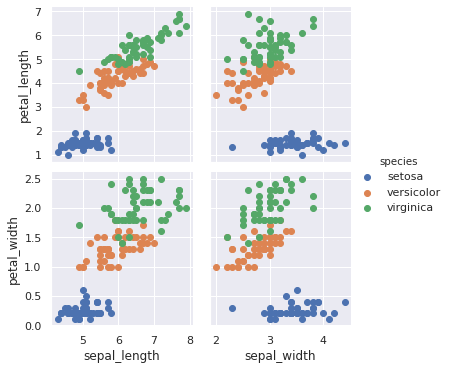

In [14]:
g = sns.PairGrid(data=iris,hue='species', x_vars=['sepal_length', 'sepal_width'], y_vars=['petal_length', 'petal_width'])
g = g.map(plt.scatter)
g = g.add_legend()

Use different functions on the upper and lower triangles:

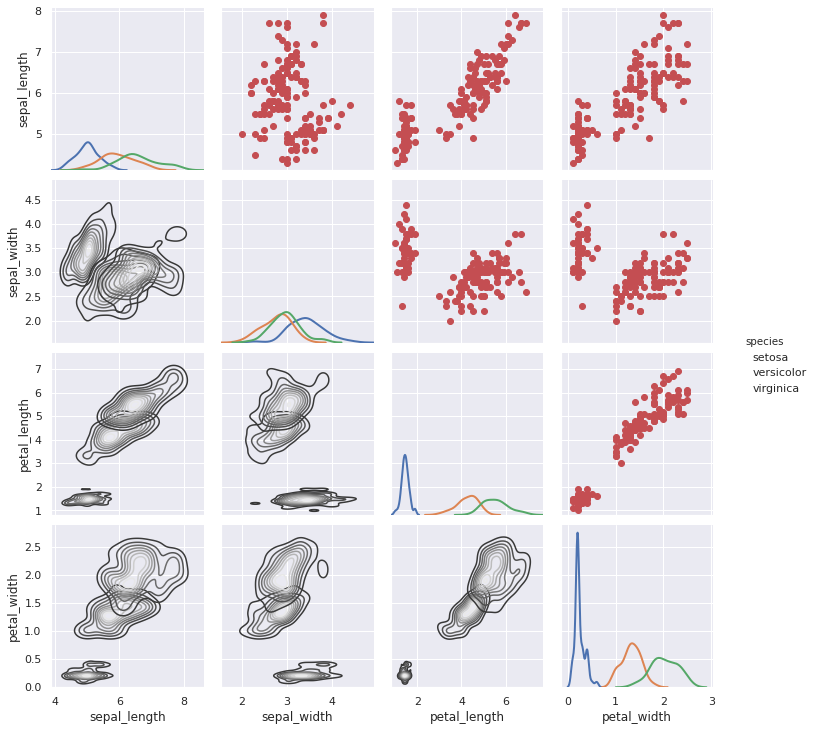

In [18]:
g = sns.PairGrid(data=iris, hue='species')
g = g.map_upper(plt.scatter, color='r')
g =g.map_lower(sns.kdeplot, color='w')
g =g.map_diag(sns.kdeplot, linewidth=2)
g =g.add_legend()

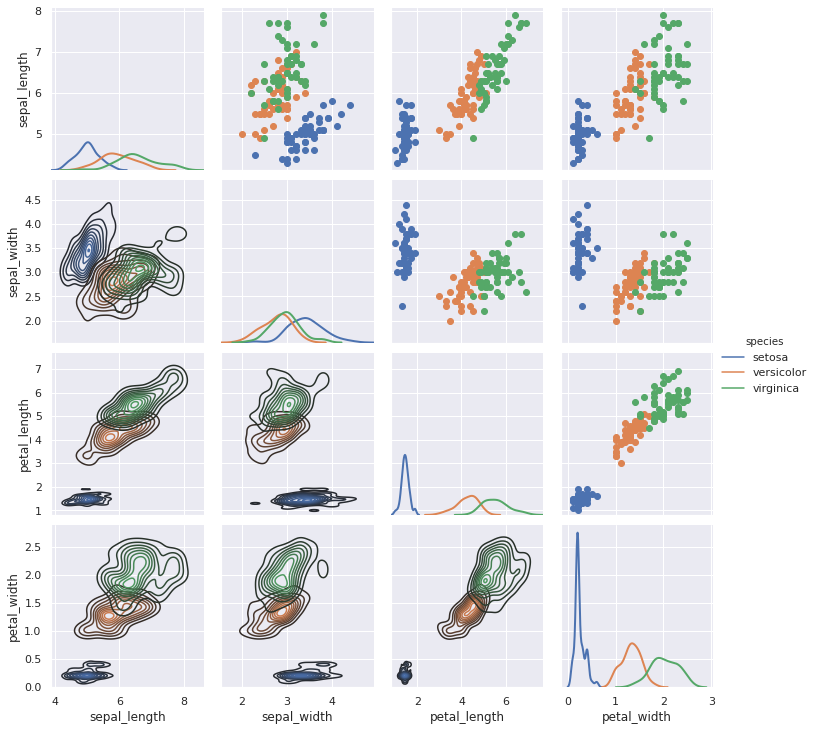

In [17]:
g = sns.PairGrid(data=iris, hue='species')
g = g.map_upper(plt.scatter)
g =g.map_lower(sns.kdeplot)
g =g.map_diag(sns.kdeplot, linewidth=2)
g =g.add_legend()

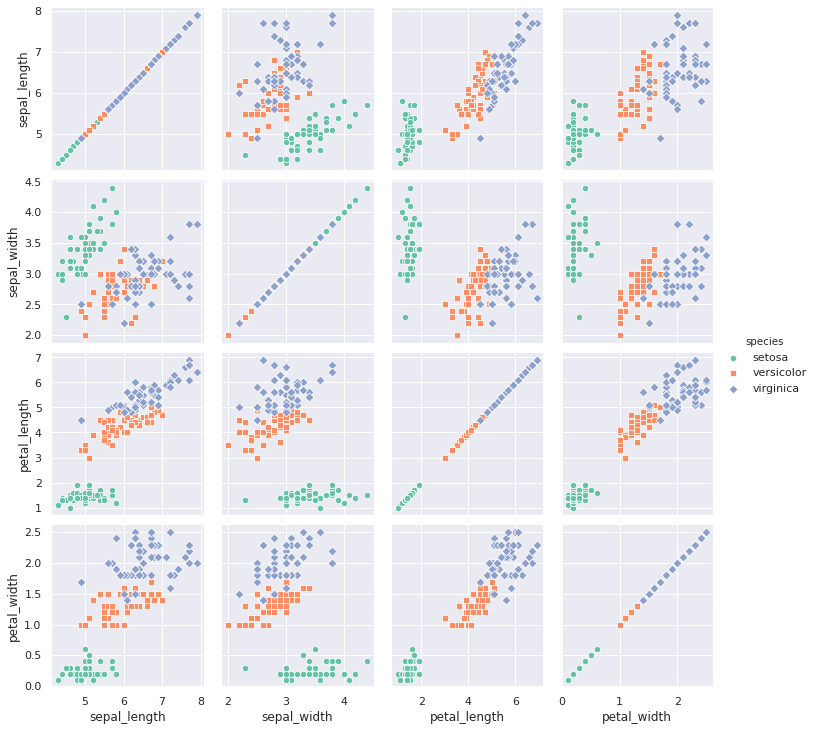

In [19]:
# Use different colors and markers for each categorical level:

g = sns.PairGrid(iris, hue="species", palette="Set2",
                 hue_kws={"marker": ["o", "s", "D"]})
g = g.map(sns.scatterplot, linewidths=1, edgecolor="w", s=40)
g = g.add_legend()